In [1]:
import matplotlib.pyplot as plt
import numpy as np
import jax
import jax.numpy as jnp
import os
import pickle
import utils


In [2]:

equation_dict = {
    'poisson_1d-sin_cos':'u = sin(6x)cos(100x)',
    'poisson_1d-x2_add_sinx': 'u = sin(500x)-2*(x-0.5)^2',
    'poisson_1d-mix_sin':'u= sin(x) + 0.1*sin(20x) + 0.05*cos(100x)',
    'poisson_1d-x_time_sinx': 'u = x*sin(200x)',
    }


def load_and_predict(prefix, save_name, N_col=200):    

    with open(prefix + save_name + '.pkl', 'rb') as f:
        params, log_dict, trick_paras = pickle.load(f)

    if 'N_col' not in list(trick_paras.keys()):
        trick_paras['N_col'] = N_col

    model, preds, Xtr = utils.get_model_1d(params, trick_paras)

    return model, preds, Xtr, log_dict

def load_and_predict_extra(prefix, save_name):    

    with open(prefix + save_name + '.pkl', 'rb') as f:
        params, params_extra, log_dict, trick_paras = pickle.load(f)

    model, preds, Xtr = utils.get_model_1d_extra(params, params_extra, trick_paras)

    return model, preds, Xtr, log_dict



In [3]:
# for poisson_1d_sincos-v1

kernel_name = 'Matern52_Cos_1d'
prefix = '../result_log/poisson_1d-sin_cos/kernel_%s/epoch_100000/Q30/'%(kernel_name)
save_name =  'llk_weight-200.0-nu-1-Q-30-epoch-100000-lr-0.0100-freqscale=30-logdet-1-x-2pi-Ncol-400'

model, preds, Xtr, log_dict = load_and_predict(prefix, save_name)

freq = model.params['kernel_paras']['freq']
weight = np.exp(model.params['kernel_paras']['log-w'])

discrete_spectrum = [1, 2, 3, 4, 5]  # 离散频谱
frequency_weights = [0.2, 0.5, 0.8, 0.3, 0.6]  # 频率权重

# 绘制竖直线图
plt.figure(figsize=(8, 5))
plt.stem(np.arange(len(freq)), weight, linefmt='b-', markerfmt='bo', basefmt=' ')

# 在每个顶端点添加文本标注
# for x, y in zip(discrete_spectrum, frequency_weights):
#     plt.text(x, y, str(y), ha='center', va='bottom')
plt.text(15, weight[15], 'freq: %.2f'%freq[15], ha='center', va='bottom')
plt.text(17, weight[17], 'freq: %.2f'%freq[17], ha='center', va='bottom')

# 设置图像标题和坐标轴标签
plt.title('Frequency Spectrum')
plt.xlabel('Index of Frequency')
plt.ylabel('Frequency Weight')
# plt.yticks([])
plt.xticks(np.arange(len(freq)),np.arange(len(freq))+1)

# 显示图像
plt.show()


'''s'''
plt.figure(figsize=(8, 5))


prun_freq = np.zeros_like(freq)

targfreq = [15, 17]

for i in targfreq:
    prun_freq[i] = freq[i]

plt.stem(np.arange(len(freq)), prun_freq, linefmt='b-', markerfmt='bo', basefmt=' ')
# 在每个顶端点添加文本标注
# for x, y in zip(discrete_spectrum, frequency_weights):
#     plt.text(x, y, str(y), ha='center', va='bottom')

for i in targfreq:
    plt.text(i, freq[i], 'freq: %.2f'%freq[i], ha='center', va='bottom')



# 设置图像标题和坐标轴标签
# plt.title('Frequency Spectrum')
plt.xlabel('Index of Frequency')
# plt.ylabel('Frequency Weight')
plt.yticks([])
plt.xticks(np.arange(len(freq)),np.arange(len(freq))+1)

# 显示图像
plt.show()



2023-09-21 19:23:55.645461: E external/xla/xla/stream_executor/cuda/cuda_dnn.cc:429] Could not create cudnn handle: CUDNN_STATUS_NOT_INITIALIZED
2023-09-21 19:23:55.645518: E external/xla/xla/stream_executor/cuda/cuda_dnn.cc:438] Possibly insufficient driver version: 525.125.6


XlaRuntimeError: FAILED_PRECONDITION: DNN library initialization failed. Look at the errors above for more details.

equation is:  poisson_1d-x_time_sinx
kernel is: Matern52_Cos_1d


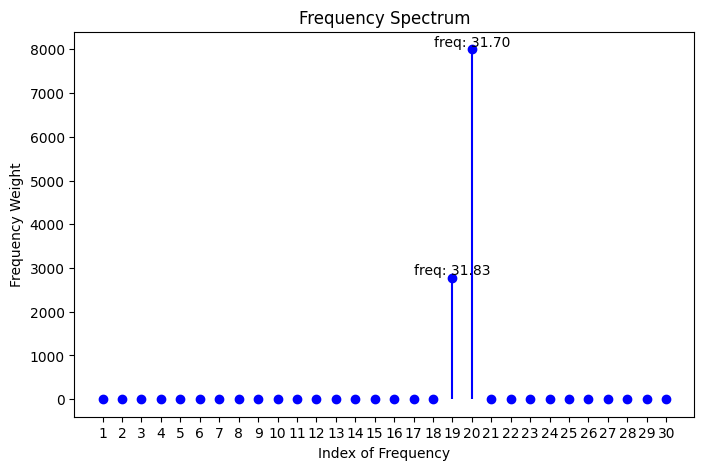

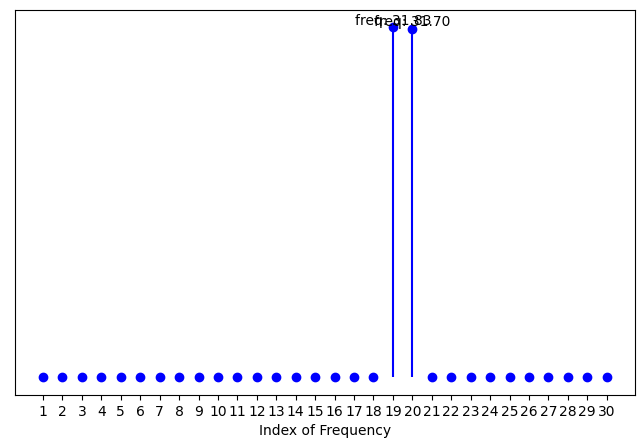

In [50]:
# for poisson_1d_sincos-v1

kernel_name = 'Matern52_Cos_1d'
prefix = '../result_log/poisson_1d-x_time_sinx/kernel_%s/epoch_100000/Q30/'%(kernel_name)
save_name = 'llk_weight-200.0-nu-1-Q-30-epoch-100000-lr-0.0100-freqscale=50-logdet-1-x-2pi-Ncol-900'

model, preds, Xtr, log_dict = load_and_predict(prefix, save_name)

freq = model.params['kernel_paras']['freq']
weight = np.exp(model.params['kernel_paras']['log-w'])


# 绘制竖直线图
plt.figure(figsize=(8, 5))
plt.stem(np.arange(len(freq)), weight, linefmt='b-', markerfmt='bo', basefmt=' ')

# 在每个顶端点添加文本标注
# for x, y in zip(discrete_spectrum, frequency_weights):
#     plt.text(x, y, str(y), ha='center', va='bottom')
plt.text(18, weight[18], 'freq: %.2f'%freq[18], ha='center', va='bottom')
plt.text(19, weight[19], 'freq: %.2f'%freq[19], ha='center', va='bottom')

# 设置图像标题和坐标轴标签
plt.title('Frequency Spectrum')
plt.xlabel('Index of Frequency')
plt.ylabel('Frequency Weight')
# plt.yticks([])
plt.xticks(np.arange(len(freq)),np.arange(len(freq))+1)

# 显示图像
plt.show()


'''s'''
plt.figure(figsize=(8, 5))


prun_freq = np.zeros_like(freq)

targfreq = [18, 19]

for i in targfreq:
    prun_freq[i] = freq[i]

plt.stem(np.arange(len(freq)), prun_freq, linefmt='b-', markerfmt='bo', basefmt=' ')
# 在每个顶端点添加文本标注
# for x, y in zip(discrete_spectrum, frequency_weights):
#     plt.text(x, y, str(y), ha='center', va='bottom')

for i in targfreq:
    plt.text(i, freq[i], 'freq: %.2f'%freq[i], ha='center', va='bottom')



# 设置图像标题和坐标轴标签
# plt.title('Frequency Spectrum')
plt.xlabel('Index of Frequency')
# plt.ylabel('Frequency Weight')
plt.yticks([])
plt.xticks(np.arange(len(freq)),np.arange(len(freq))+1)

# 显示图像
plt.show()

equation is:  poisson_1d-mix_sin
kernel is: Matern52_Cos_1d
using extra GP with kernel: Matern52_1d


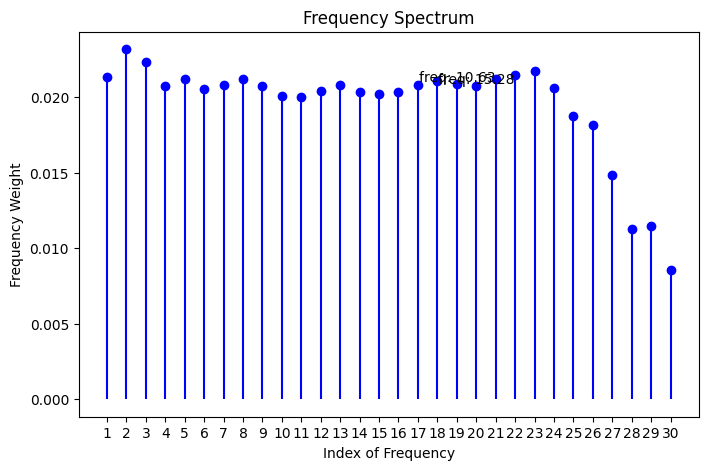

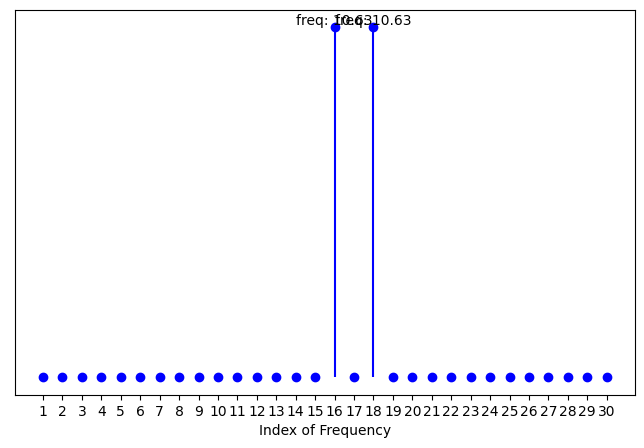

In [46]:
# for 

kernel_name = 'Matern52_Cos_1d-extra-Matern52_1d'
prefix = '../result_log/poisson_1d-mix_sin/kernel_%s/epoch_50000/Q30/'%(kernel_name)
save_name = 'llk_weight-200.0-nu-1-Q-30-epoch-50000-lr-0.0100-freqscale=20-logdet-1extra_GP-x-2pi-Ncol-900'
model, preds, Xtr, log_dict = load_and_predict_extra(prefix, save_name)

freq = model.params['kernel_paras']['freq']
weight = np.exp(model.params['kernel_paras']['log-w'])


# 绘制竖直线图
plt.figure(figsize=(8, 5))
plt.stem(np.arange(len(freq)), weight, linefmt='b-', markerfmt='bo', basefmt=' ')

# 在每个顶端点添加文本标注
# for x, y in zip(discrete_spectrum, frequency_weights):
#     plt.text(x, y, str(y), ha='center', va='bottom')
plt.text(18, weight[18], 'freq: %.2f'%freq[18], ha='center', va='bottom')
plt.text(19, weight[19], 'freq: %.2f'%freq[19], ha='center', va='bottom')

# 设置图像标题和坐标轴标签
plt.title('Frequency Spectrum')
plt.xlabel('Index of Frequency')
plt.ylabel('Frequency Weight')
# plt.yticks([])
plt.xticks(np.arange(len(freq)),np.arange(len(freq))+1)

# 显示图像
plt.show()


equation is:  advection-sin
kernel is: Matern52_Cos_1d


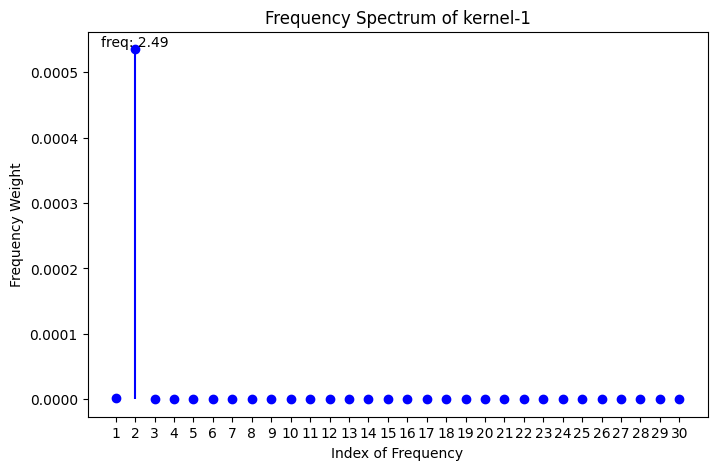

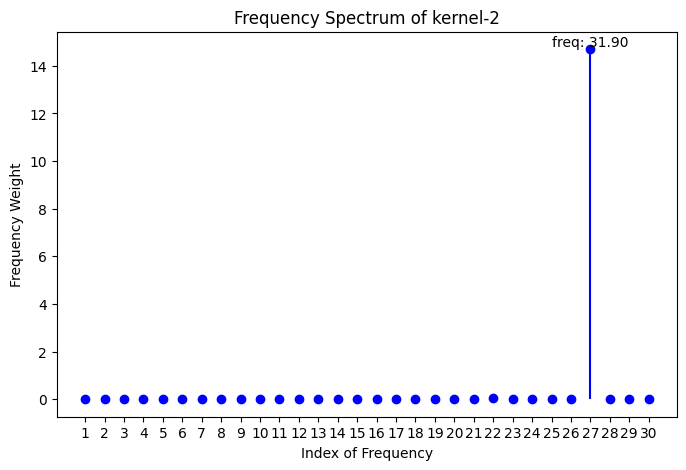

In [17]:
# for 
def load_and_predict_advection(prefix, save_name):    

    with open(prefix + save_name + '.pkl', 'rb') as f:
        params, log_dict, trick_paras = pickle.load(f)

    model, preds = utils.get_model_2d_advection(params, trick_paras)

    return model, preds, log_dict
kernel_name = 'Matern52_Cos_1d'
prefix = '../result_log/advection-sin/kernel_%s/epoch_1000000/Q30/'%(kernel_name)
save_name = 'llk_weight-500.0-nu-1-Q-30-epoch-1000000-lr-0.0100-freqscale=40-logdet-1beta-200'
model, preds,log_dict = load_and_predict_advection(prefix, save_name)

freq1 = model.params['kernel_paras_1']['freq']
weight1 = np.exp(model.params['kernel_paras_1']['log-w'])

freq2 = model.params['kernel_paras_2']['freq']
weight2 = np.exp(model.params['kernel_paras_2']['log-w'])

# 绘制竖直线图
plt.figure(figsize=(8, 5))
plt.stem(np.arange(len(freq1)), weight1, linefmt='b-', markerfmt='bo', basefmt=' ')

plt.text(1, weight1[1], 'freq: %.2f'%freq1[18], ha='center', va='bottom')
plt.title('Frequency Spectrum of kernel-1')
plt.xlabel('Index of Frequency')
plt.ylabel('Frequency Weight')
plt.xticks(np.arange(len(freq1)),np.arange(len(freq1))+1)

plt.figure(figsize=(8, 5))
plt.stem(np.arange(len(freq2)), weight2, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.text(26, weight2[26], 'freq: %.2f'%freq2[18], ha='center', va='bottom')
# 在每个顶端点添加文本标注
# for x, y in zip(discrete_spectrum, frequency_weights):
#     plt.text(x, y, str(y), ha='center', va='bottom')
# plt.text(18, weight[18], 'freq: %.2f'%freq[18], ha='center', va='bottom')
# plt.text(19, weight[19], 'freq: %.2f'%freq[19], ha='center', va='bottom')

# 设置图像标题和坐标轴标签
plt.title('Frequency Spectrum of kernel-2')
plt.xlabel('Index of Frequency')
plt.ylabel('Frequency Weight')
# plt.yticks([])
plt.xticks(np.arange(len(freq2)),np.arange(len(freq2))+1)

# 显示图像
plt.show()
